# Results and visualizations
**By Viktor Due Pedersen(vipe) and Aske Schytt Meineche (askm)**

## Imports

In [1]:
import plotting_tools as pt

# Select model experiments*
month_dir = "model_outputs/months/"
satellite_dir = "model_outputs/satellites/"
band_dir = "model_outputs/bands_medium/"

# Evaluation Data

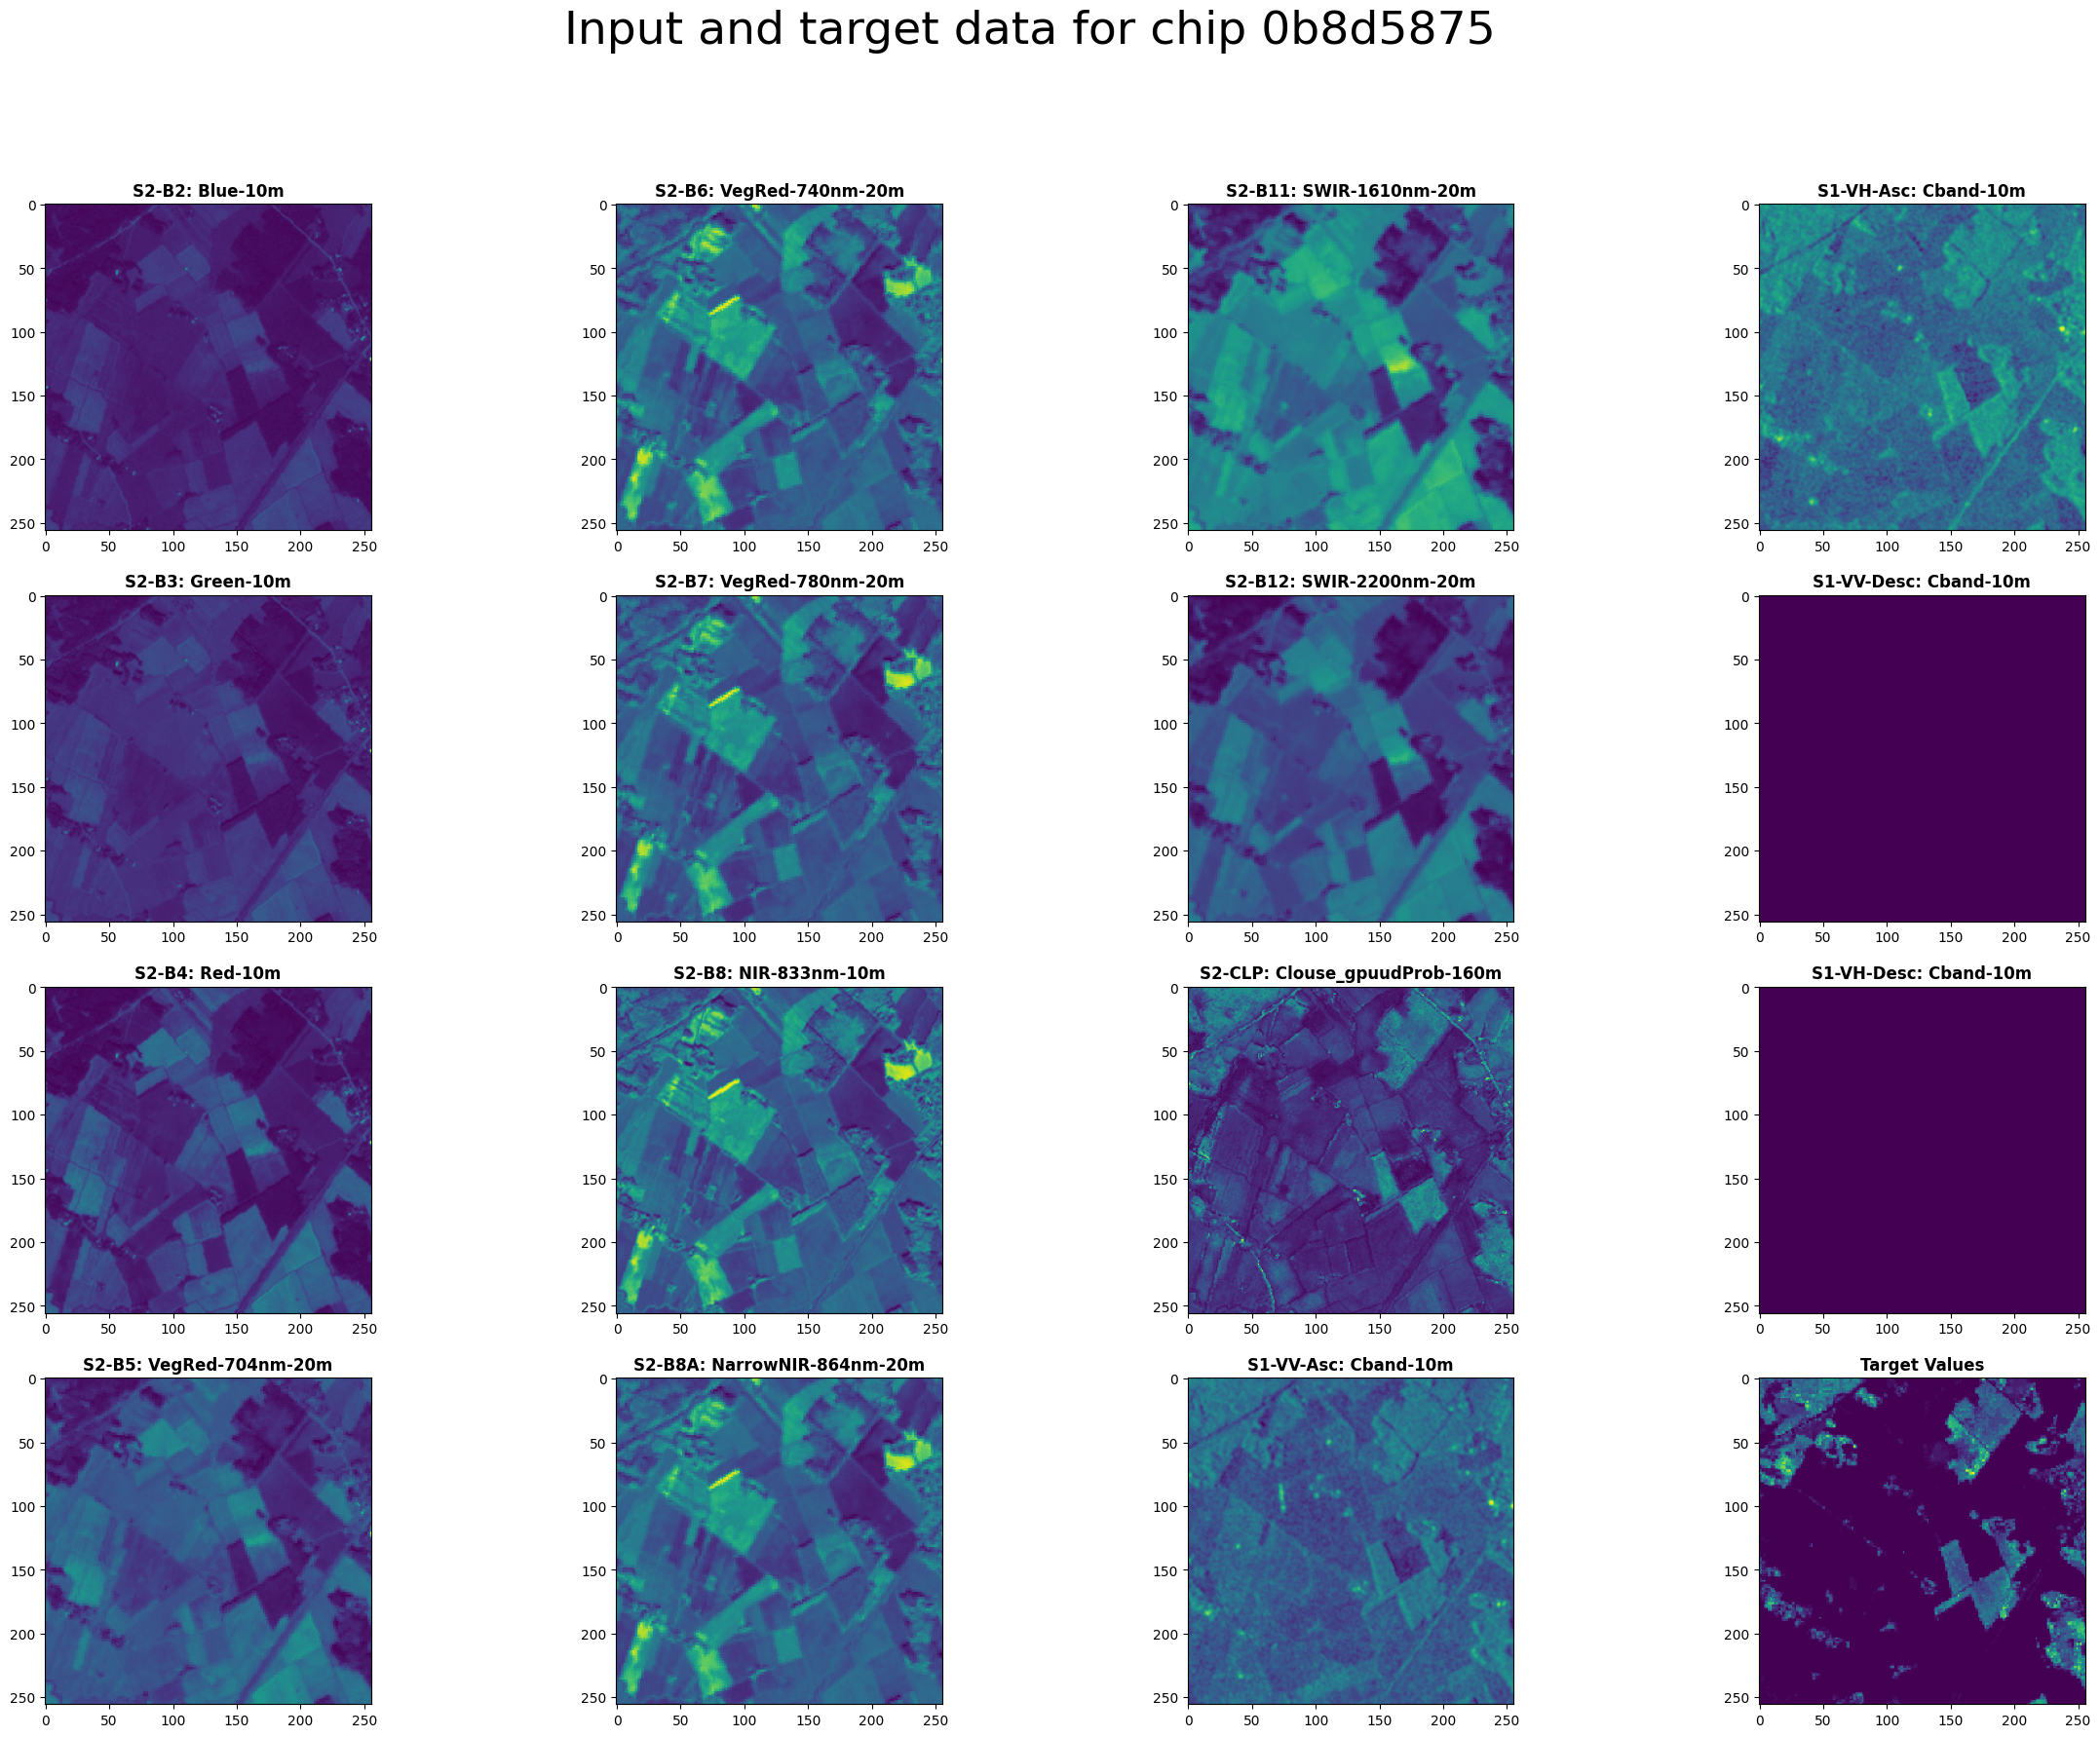

In [2]:
chip_id = "0b8d5875"

pt.plot_input_data(chip_id)

## See training / Validation curve

{'num_input_channels': 15, 'conv_filters1': 4, 'conv_filters2': 8, 'conv_filters3': 4, 'num_dpoints': 6000, 'exclude_layer': None, 'exclude_layer_name': 'No Layer Excluded', 'num_epochs': 10}


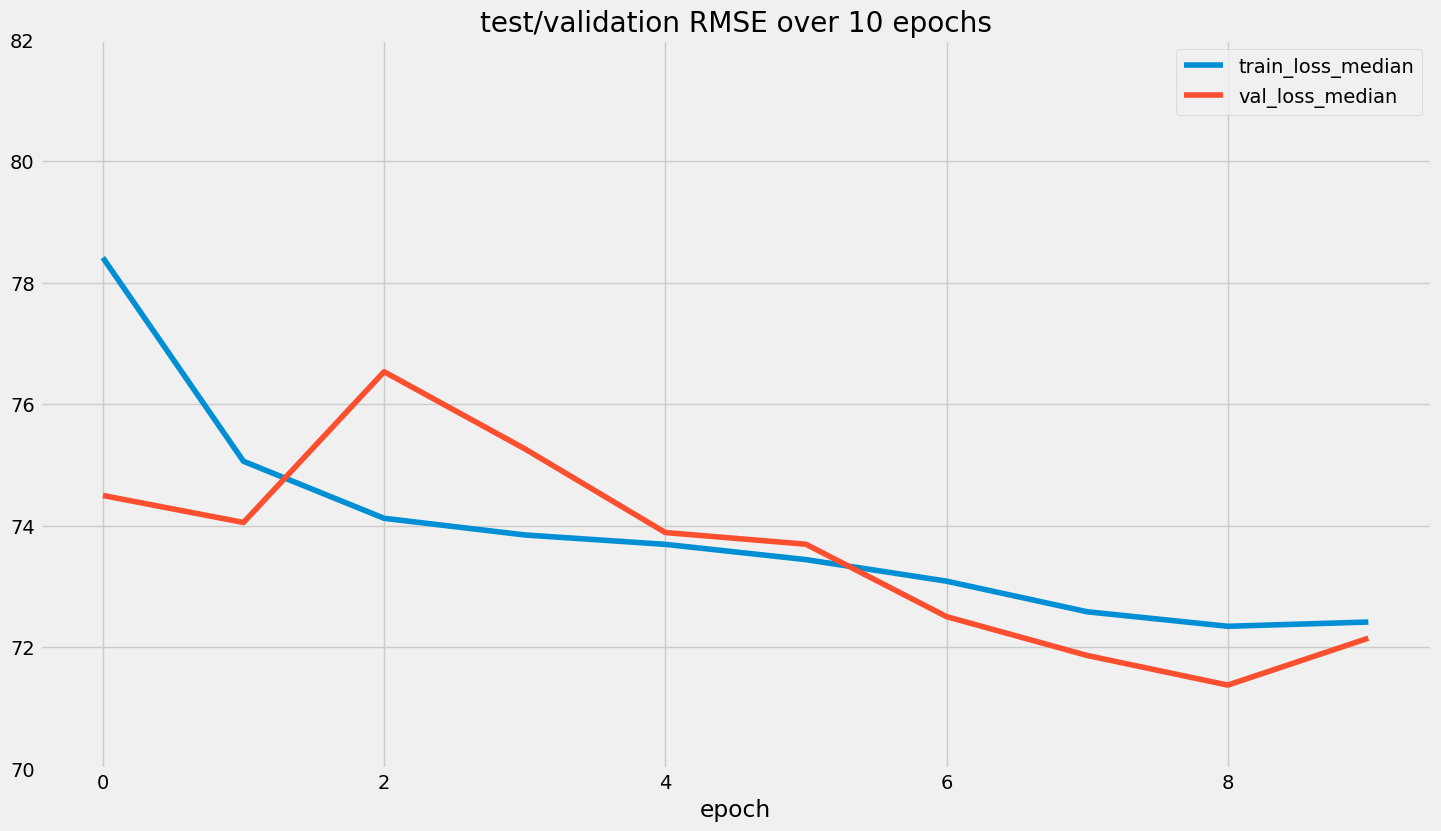

In [3]:
pt.plot_best_config(satellite_dir)

In [4]:
model = pt.get_model_from_path(satellite_dir)

## Performance on months when training on global dataset 

EVALUATING MODEL ON Sept


100%|██████████| 100/100 [00:02<00:00, 42.14it/s]
100it [00:00, 106.79it/s]


EVALUATING MODEL ON Oct


100%|██████████| 100/100 [00:02<00:00, 45.67it/s]
100it [00:00, 102.42it/s]


EVALUATING MODEL ON Nov


100%|██████████| 100/100 [00:02<00:00, 45.00it/s]
100it [00:01, 99.52it/s]


EVALUATING MODEL ON Dec


100%|██████████| 100/100 [00:02<00:00, 45.42it/s]
100it [00:01, 98.15it/s]


EVALUATING MODEL ON Jan


100%|██████████| 100/100 [00:02<00:00, 44.75it/s]
100it [00:01, 97.84it/s]


EVALUATING MODEL ON Feb


100%|██████████| 100/100 [00:02<00:00, 42.96it/s]
100it [00:01, 98.18it/s]


EVALUATING MODEL ON March


100%|██████████| 100/100 [00:02<00:00, 44.07it/s]
100it [00:01, 98.81it/s]


EVALUATING MODEL ON April


100%|██████████| 100/100 [00:02<00:00, 43.62it/s]
100it [00:01, 81.07it/s]


EVALUATING MODEL ON May


100%|██████████| 100/100 [00:02<00:00, 43.91it/s]
100it [00:01, 99.56it/s]


EVALUATING MODEL ON June


100%|██████████| 100/100 [00:02<00:00, 44.04it/s]
100it [00:01, 98.77it/s]


EVALUATING MODEL ON July


100%|██████████| 100/100 [00:02<00:00, 43.93it/s]
100it [00:01, 97.60it/s]


EVALUATING MODEL ON Aug


100%|██████████| 100/100 [00:02<00:00, 44.49it/s]
100it [00:01, 97.79it/s]


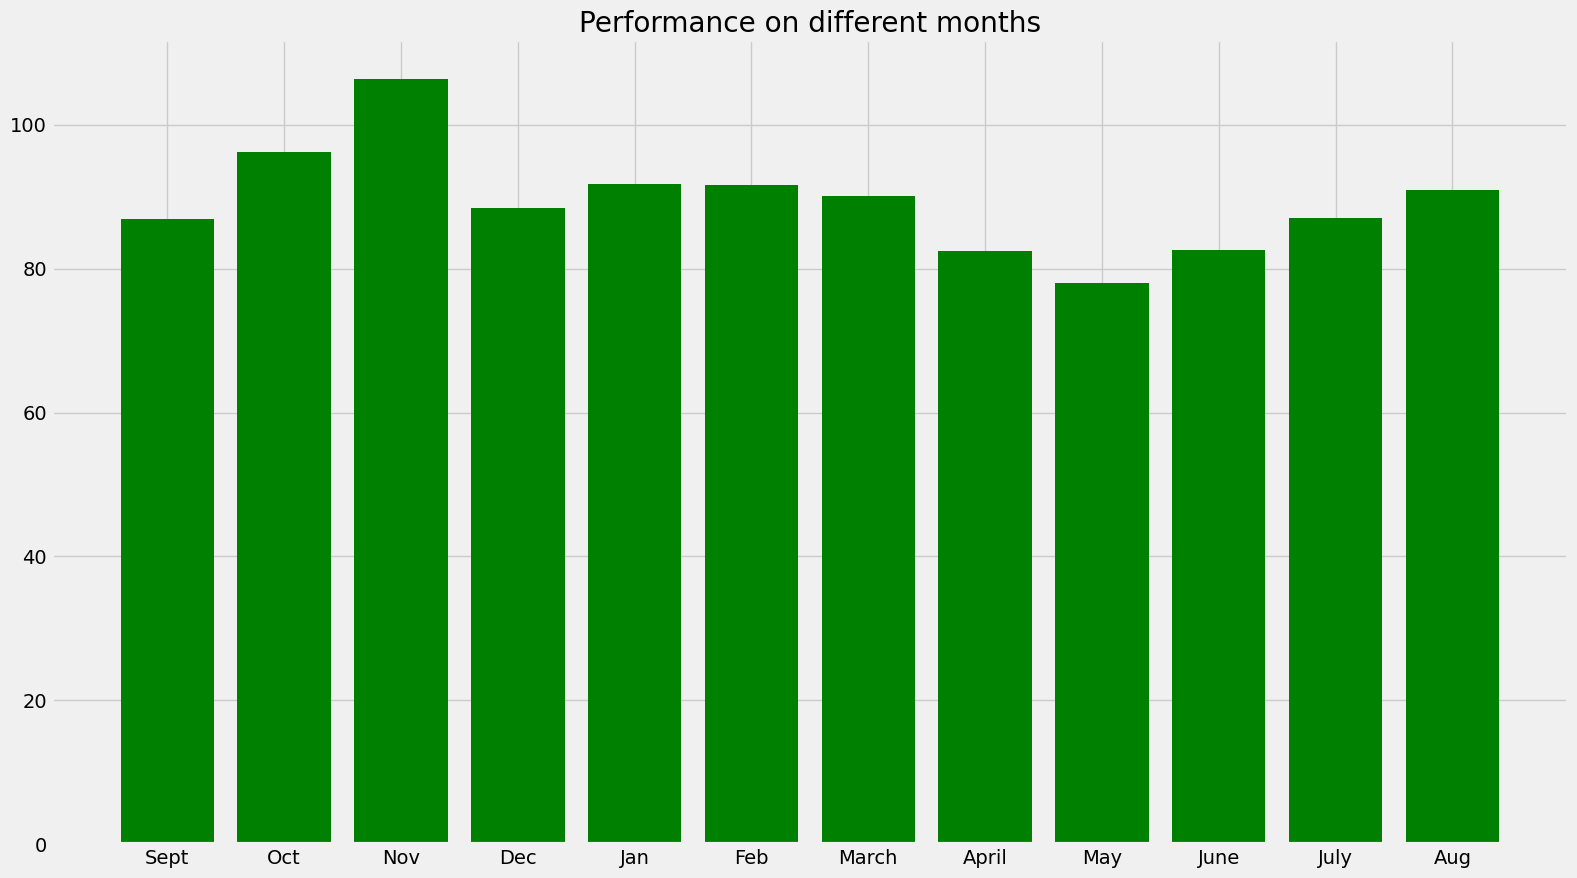

In [5]:
# create subsets
# pt.create_monthly_datasets()

# load model
model = pt.get_model_from_path(satellite_dir)
# model.eval()

pt.evaluate_monthly(model)

## Performance on months when training monthly

EVALUATING MODEL ON Sept


100%|██████████| 100/100 [00:02<00:00, 43.74it/s]
100it [00:00, 101.79it/s]


EVALUATING MODEL ON Oct


100%|██████████| 100/100 [00:02<00:00, 44.43it/s]
100it [00:01, 82.59it/s]


EVALUATING MODEL ON Nov


100%|██████████| 100/100 [00:02<00:00, 43.82it/s]
100it [00:01, 96.51it/s]


EVALUATING MODEL ON Dec


100%|██████████| 100/100 [00:02<00:00, 43.82it/s]
100it [00:01, 96.66it/s]


EVALUATING MODEL ON Jan


100%|██████████| 100/100 [00:02<00:00, 44.19it/s]
100it [00:01, 97.09it/s]


EVALUATING MODEL ON Feb


100%|██████████| 100/100 [00:02<00:00, 44.28it/s]
100it [00:01, 97.63it/s]


EVALUATING MODEL ON March


100%|██████████| 100/100 [00:02<00:00, 43.62it/s]
100it [00:01, 95.91it/s]


EVALUATING MODEL ON April


100%|██████████| 100/100 [00:02<00:00, 44.24it/s]
100it [00:01, 81.86it/s]


EVALUATING MODEL ON May


100%|██████████| 100/100 [00:02<00:00, 44.23it/s]
100it [00:01, 80.93it/s]


EVALUATING MODEL ON June


100%|██████████| 100/100 [00:02<00:00, 44.19it/s]
100it [00:01, 81.61it/s]


EVALUATING MODEL ON July


100%|██████████| 100/100 [00:02<00:00, 44.55it/s]
100it [00:01, 76.97it/s]


EVALUATING MODEL ON Aug


100%|██████████| 100/100 [00:02<00:00, 43.04it/s]
100it [00:01, 78.63it/s]


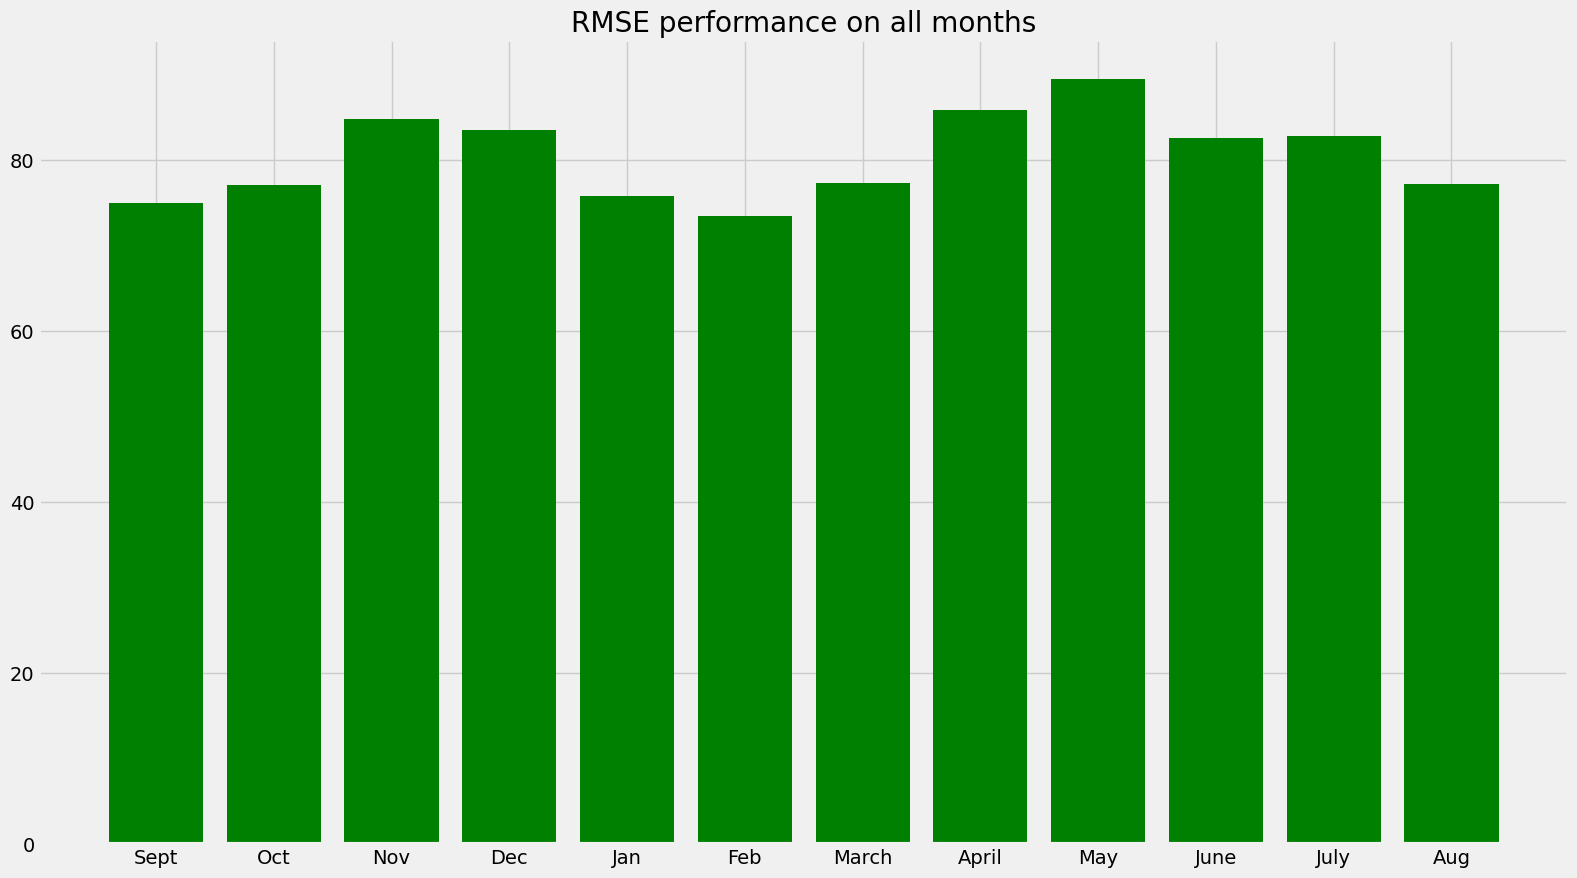

In [6]:
models = pt.get_best_model_pr_month(month_dir)
pt.evaluate_monthly_multiple(models)

## Performance on single datapoints on worst month vs best month
* Note that we randomly select datapoints for visualization - if the given patch looks boring, then just restart the kernel and run again :-) 

100%|██████████| 100/100 [00:02<00:00, 43.84it/s]
0it [00:00, ?it/s]


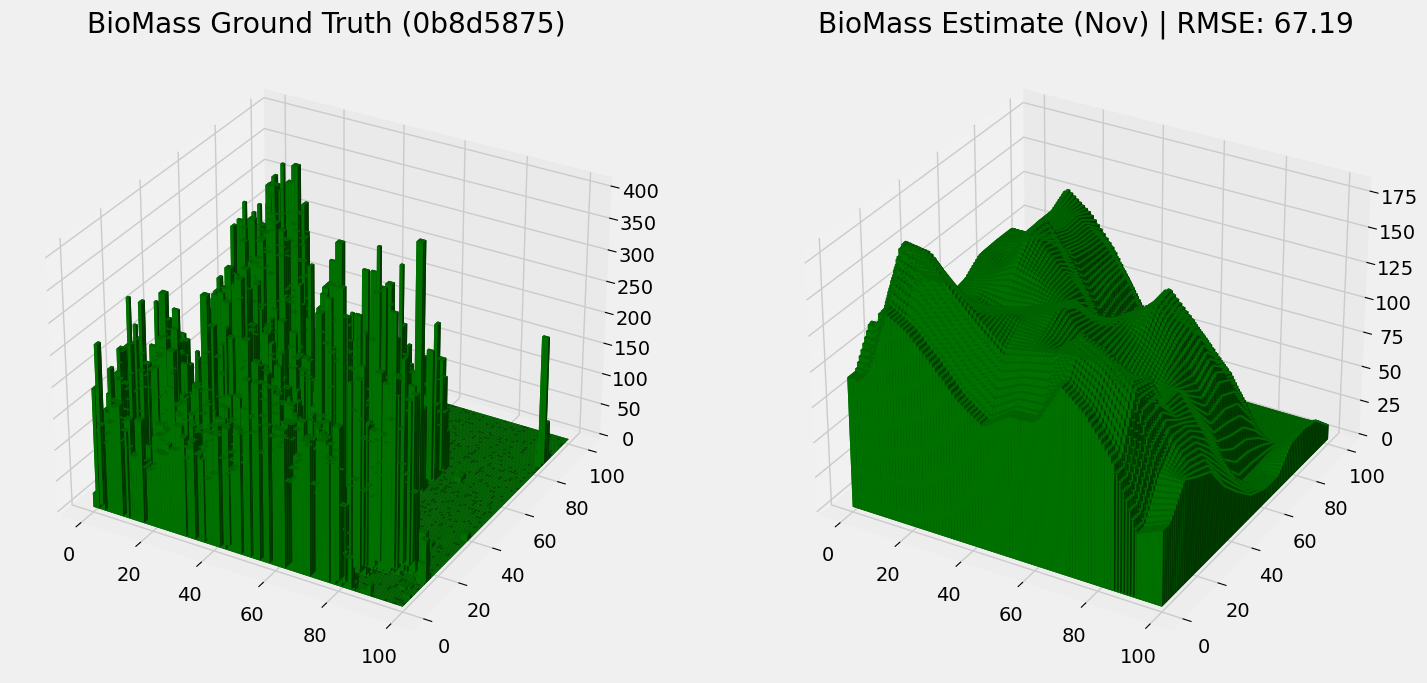

ERROR 67.19321


In [7]:
month = "Nov"

chip_id, fpath, df = pt.get_subset_from_month(month, chip_id)

pt.plot_agbm(chip_id=chip_id, fpath=fpath, df=df, model=model, month=month)

100%|██████████| 100/100 [00:02<00:00, 44.66it/s]
0it [00:00, ?it/s]


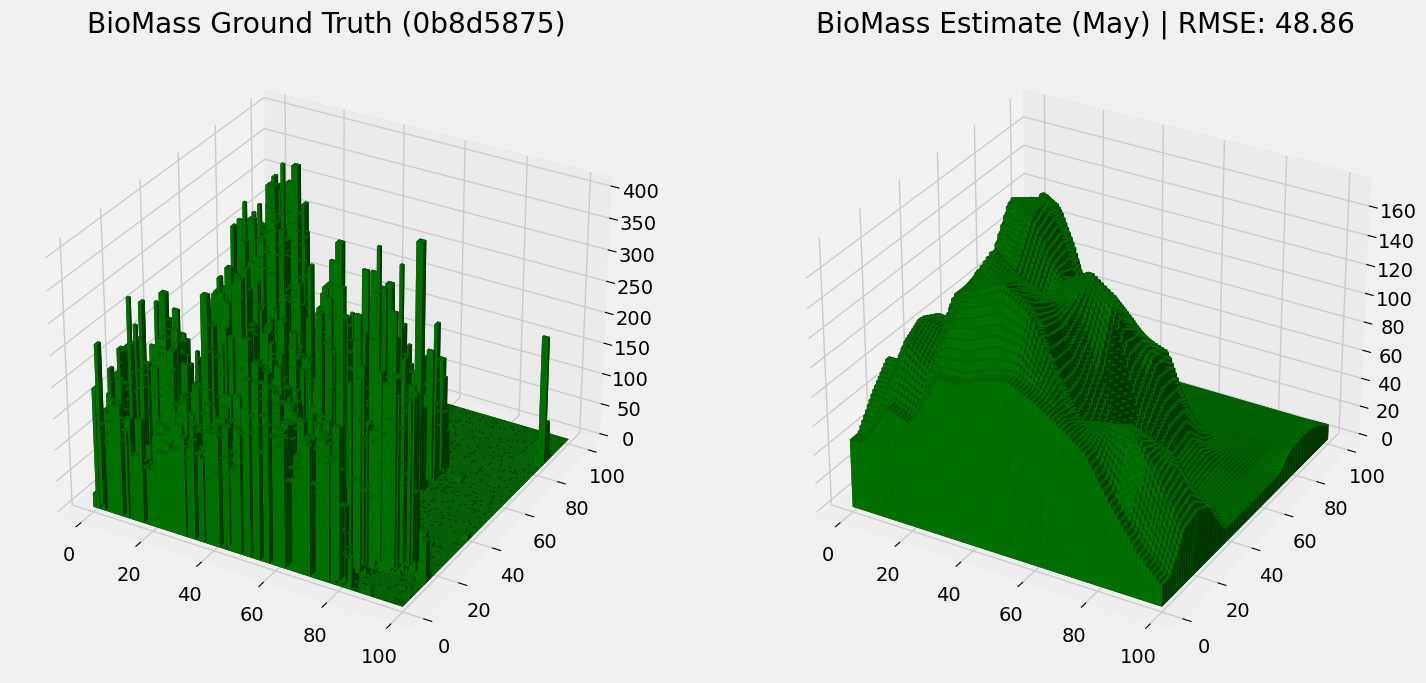

ERROR 48.85672


In [8]:
month = "May"

chip_id, fpath, df = pt.get_subset_from_month(month, chip_id)

pt.plot_agbm(chip_id=chip_id, fpath=fpath, df=df, model=model, month=month)

## Ablation Study on Satellites

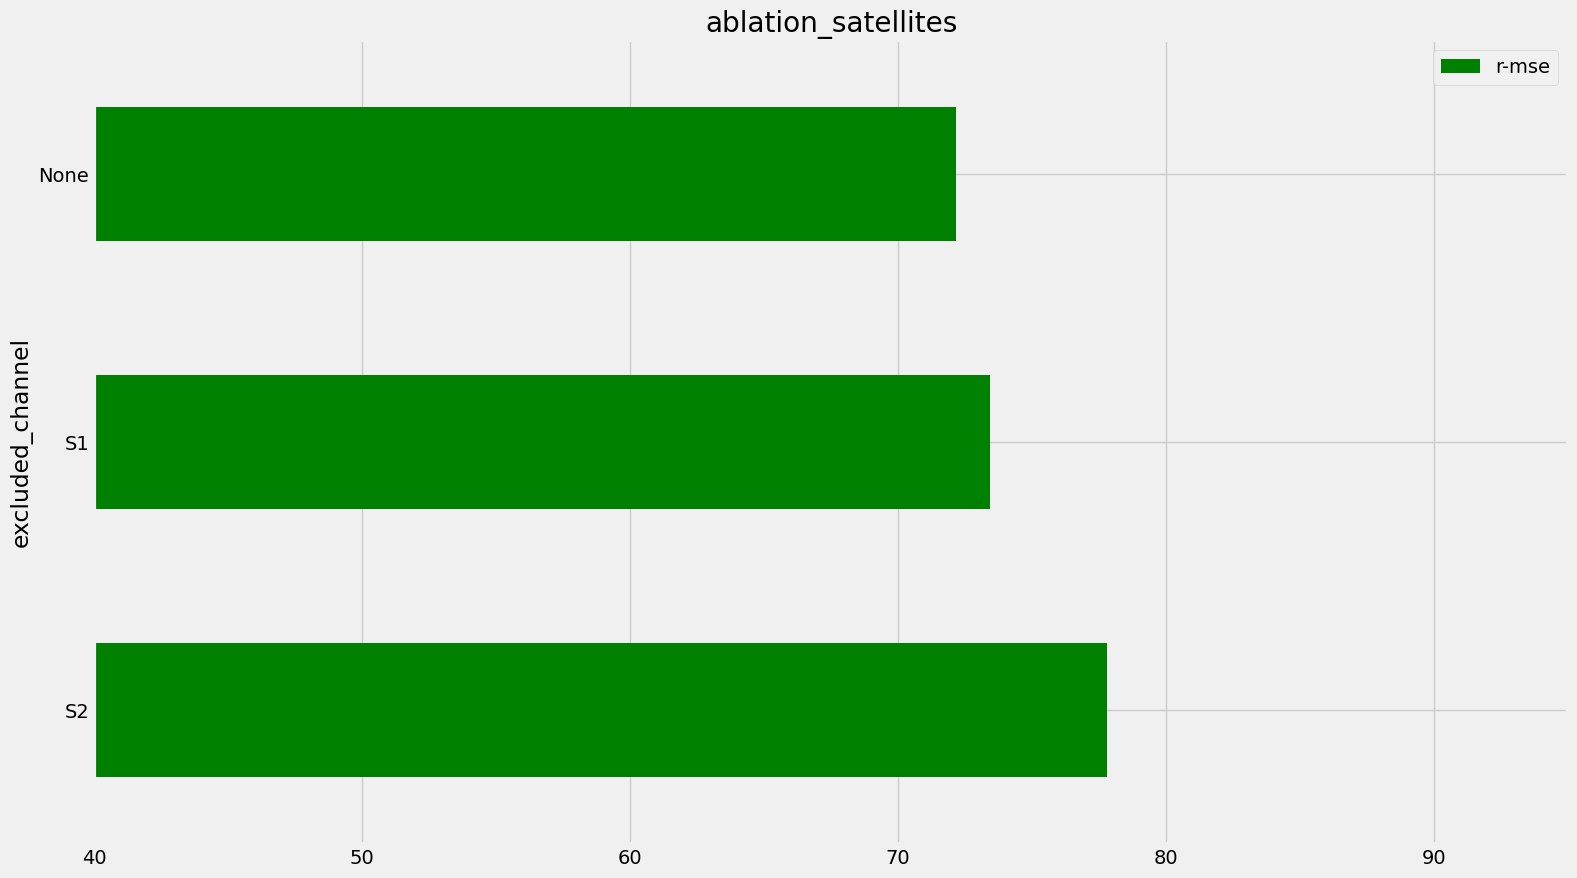

In [9]:
conf = pt.plot_ablation(
    satellite_dir,
    metric="val_loss_median",
    id_="exclude_layer",
    title="ablation_satellites",
)

## Ablation study on bands

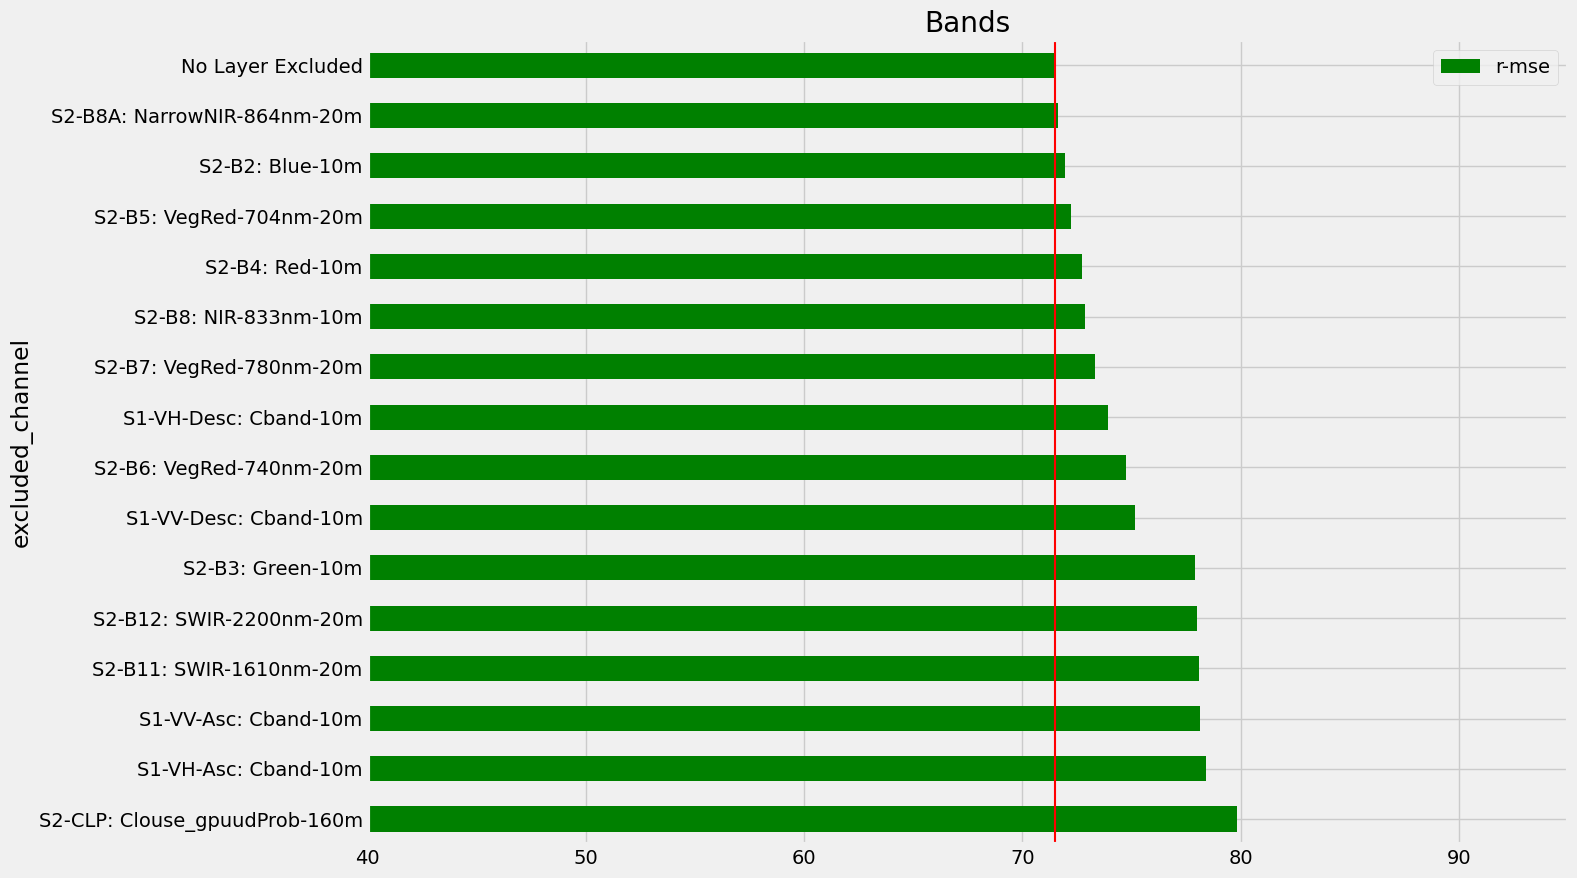

In [10]:
conf = pt.plot_ablation(
    band_dir,
    metric="val_loss_median",
    id_="exclude_layer_name",
    title="Bands",
    vline="No Layer Excluded",
)